In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# visulaisation
from matplotlib.pyplot import xticks
%matplotlib inline
from IPython.display import Markdown, display ,HTML


In [2]:
data1 = pd.DataFrame(pd.read_excel('Data+Dictionary-+Telecom+Churn+Case+Study.xlsx'))
data1

,Acronyms,Descriptions
0,MOBILE_NUMBER,Customer phone number
1,CIRCLE_ID,Telecom circle area to which the customer belo...
2,LOC,Local calls - within same telecom circle
3,STD,STD calls - outside the calling circle
4,IC,Incoming calls
5,OG,Outgoing calls
6,T2T,"Operator T to T, i.e. within same operator (mo..."
7,T2M,Operator T to other operator mobile
8,T2O,Operator T to other operator fixed line
9,T2F,Operator T to fixed lines of T


In [3]:
data = pd.DataFrame(pd.read_csv('telecom_churn_data.csv'))

In [4]:
data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [5]:
#checking duplicates
sum(data.duplicated(subset = 'mobile_number')) == 0
# There are No duplicate values

True

In [6]:
amt_recharge_columns =  data.columns[data.columns.str.contains('rech_amt|rech_data')]
print(amt_recharge_columns)

Index(['total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8',
       'total_rech_amt_9', 'max_rech_amt_6', 'max_rech_amt_7',
       'max_rech_amt_8', 'max_rech_amt_9', 'date_of_last_rech_data_6',
       'date_of_last_rech_data_7', 'date_of_last_rech_data_8',
       'date_of_last_rech_data_9', 'total_rech_data_6', 'total_rech_data_7',
       'total_rech_data_8', 'total_rech_data_9', 'max_rech_data_6',
       'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9',
       'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8',
       'av_rech_amt_data_9'],
      dtype='object')


In [7]:
x = pd.DataFrame(round(100*(data.loc[:,amt_recharge_columns].isnull().sum()/len(data.index)), 2))
x.sort_index(axis=0
             ,ascending=True)
display(x)

,0
total_rech_amt_6,0.00
total_rech_amt_7,0.00
total_rech_amt_8,0.00
total_rech_amt_9,0.00
max_rech_amt_6,0.00
max_rech_amt_7,0.00
max_rech_amt_8,0.00
max_rech_amt_9,0.00
date_of_last_rech_data_6,74.85
date_of_last_rech_data_7,74.43


In [8]:
data.loc[:,amt_recharge_columns].describe()

,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9
count,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.00000,25153.000000,25571.000000,26339.000000,25922.000000
mean,327.514615,322.962970,324.157122,303.345673,104.637486,104.752398,107.728207,101.943889,2.463802,2.666419,2.651999,2.441170,126.393392,126.729459,125.717301,124.94144,192.600982,200.981292,197.526489,192.734315
std,398.019701,408.114237,416.540455,404.588583,120.614894,124.523970,126.902505,125.375109,2.789128,3.031593,3.074987,2.516339,108.477235,109.765267,109.437851,111.36376,192.646318,196.791224,191.301305,188.400286
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,0.500000,0.500000,1.000000
25%,109.000000,100.000000,90.000000,52.000000,30.000000,30.000000,30.000000,28.000000,1.000000,1.000000,1.000000,1.000000,25.000000,25.000000,25.000000,25.00000,82.000000,92.000000,87.000000,69.000000
50%,230.000000,220.000000,225.000000,200.000000,110.000000,110.000000,98.000000,61.000000,1.000000,1.000000,1.000000,2.000000,145.000000,145.000000,145.000000,145.00000,154.000000,154.000000,154.000000,164.000000
75%,437.500000,428.000000,434.500000,415.000000,120.000000,128.000000,144.000000,144.000000,3.000000,3.000000,3.000000,3.000000,177.000000,177.000000,179.000000,179.00000,252.000000,252.000000,252.000000,252.000000
max,35190.000000,40335.000000,45320.000000,37235.000000,4010.000000,4010.000000,4449.000000,3399.000000,61.000000,54.000000,60.000000,84.000000,1555.000000,1555.000000,1555.000000,1555.00000,7546.000000,4365.000000,4076.000000,4061.000000


In [9]:
### Replacing NA to Meaningfull Missing which is 0 in 

In [10]:
data['total_rech_data_6'] = data['total_rech_data_6'].replace(np.NaN,0.0)
data['total_rech_data_7'] = data['total_rech_data_7'].replace(np.NaN,0.0)
data['total_rech_data_8'] = data['total_rech_data_8'].replace(np.NaN,0.0)

In [11]:
data['av_rech_amt_data_6'] = data['av_rech_amt_data_6'].replace(np.NaN,0.0)
data['av_rech_amt_data_7'] = data['av_rech_amt_data_7'].replace(np.NaN,0.0)
data['av_rech_amt_data_8'] = data['av_rech_amt_data_8'].replace(np.NaN,0.0)

In [12]:
#Adding new column total recharge amount for data: total_rech_amt_data for calculating High Value customer process

In [13]:
data['total_rech_data_amt_6'] = data['av_rech_amt_data_6'] * data['total_rech_data_6']
data['total_rech_data_amt_7'] = data['av_rech_amt_data_7'] * data['total_rech_data_7']
data['total_rech_data_amt_8'] = data['av_rech_amt_data_8'] * data['total_rech_data_8']
data['total_rech_data_amt_9'] = data['av_rech_amt_data_9'] * data['total_rech_data_9']

In [14]:
data['loc_og_t2o_mou'].value_counts()

0.0    98981
Name: loc_og_t2o_mou, dtype: int64

In [15]:
data['std_og_t2o_mou'].value_counts()

0.0    98981
Name: std_og_t2o_mou, dtype: int64

In [16]:
data['loc_ic_t2o_mou'].value_counts()

0.0    98981
Name: loc_ic_t2o_mou, dtype: int64

In [17]:
data.drop(['total_rech_data_6','total_rech_data_7','total_rech_data_8','total_rech_data_9',
'av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8','av_rech_amt_data_9','loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou'],axis = 1,inplace = True)

In [18]:

#finding amount of 2 good month 6 and 7 i.e 'Good Phase'

data['total_avg_rech_amnt_6_7_GPhase'] = (data.total_rech_amt_6  \
                                               + data.total_rech_amt_7)/2

In [19]:
data.shape

(99999, 220)

In [20]:
data.info(verbose=True,null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 220 columns):
mobile_number                     99999 non-null int64
circle_id                         99999 non-null int64
last_date_of_month_6              99999 non-null object
last_date_of_month_7              99398 non-null object
last_date_of_month_8              98899 non-null object
last_date_of_month_9              98340 non-null object
arpu_6                            99999 non-null float64
arpu_7                            99999 non-null float64
arpu_8                            99999 non-null float64
arpu_9                            99999 non-null float64
onnet_mou_6                       96062 non-null float64
onnet_mou_7                       96140 non-null float64
onnet_mou_8                       94621 non-null float64
onnet_mou_9                       92254 non-null float64
offnet_mou_6                      96062 non-null float64
offnet_mou_7                      96140 non

In [21]:
data.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,mobile_number,circle_id,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,...,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_data_amt_6,total_rech_data_amt_7,total_rech_data_amt_8,total_rech_data_amt_9,total_avg_rech_amnt_6_7_GPhase
count,9.999900e+04,99999.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,...,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,25922.000000,99999.000000
mean,7.001207e+09,109.0,282.987358,278.536648,279.154731,261.645069,132.395875,133.670805,133.018098,130.302327,...,1219.854749,68.170248,66.839062,60.021204,3.299373,148.883796,171.294755,174.701228,579.109235,325.238792
std,6.956694e+05,0.0,328.439770,338.156291,344.474791,341.998630,297.207406,308.794148,308.951589,308.477668,...,954.733842,267.580450,271.201856,253.938223,32.408353,804.258761,843.284525,945.517662,1704.046584,370.833466
min,7.000000e+09,109.0,-2258.709000,-2014.045000,-945.808000,-1899.505000,0.000000,0.000000,0.000000,0.000000,...,180.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,7.000606e+09,109.0,93.411500,86.980500,84.126000,62.685000,7.380000,6.660000,6.460000,5.330000,...,467.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,125.000000,115.000000
50%,7.001205e+09,109.0,197.704000,191.640000,192.080000,176.849000,34.310000,32.330000,32.360000,29.840000,...,863.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,207.000000,229.000000
75%,7.001812e+09,109.0,371.060000,365.344500,369.370500,353.466500,118.740000,115.595000,115.860000,112.130000,...,1807.500000,0.000000,0.000000,0.000000,0.000000,13.000000,17.000000,23.000000,608.000000,419.000000
90%,7.002174e+09,109.0,620.075400,617.252000,618.160400,601.537000,344.102000,348.035000,345.030000,342.890000,...,2799.200000,160.372000,139.302000,112.646000,0.000000,252.000000,309.000000,345.000000,1280.900000,698.000000
95%,7.002291e+09,109.0,829.488200,828.357200,833.303300,805.107200,612.407500,624.835500,620.690000,617.232500,...,3110.000000,465.213000,450.705000,400.178000,0.500000,662.100000,828.000000,828.000000,2100.000000,937.500000
99%,7.002387e+09,109.0,1410.792540,1428.685880,1455.539960,1402.445660,1431.760500,1478.533300,1480.334000,1445.766400,...,3651.000000,1240.063600,1278.158000,1187.785200,86.554000,2541.000000,3006.280000,2990.040000,5190.010000,1590.000000


In [22]:
x = pd.DataFrame(round(100*(data.isnull().sum()/len(data.index)), 2))
x.sort_index(axis=0
             ,ascending=True)

,0
aon,0.00
arpu_2g_6,74.85
arpu_2g_7,74.43
arpu_2g_8,73.66
arpu_2g_9,74.08
arpu_3g_6,74.85
arpu_3g_7,74.43
arpu_3g_8,73.66
arpu_3g_9,74.08
arpu_6,0.00


In [23]:
# Droping columns having more than 70% NA values.
data = data.drop(data.loc[:,list(round(100*(data.isnull().sum()/len(data.index)), 2)>70)].columns, 1)

In [24]:
x = pd.DataFrame(round(100*(data.isnull().sum()/len(data.index)), 2))
x.sort_index(axis=1
             ,ascending=True)

,0
mobile_number,0.00
circle_id,0.00
last_date_of_month_6,0.00
last_date_of_month_7,0.60
last_date_of_month_8,1.10
last_date_of_month_9,1.66
arpu_6,0.00
arpu_7,0.00
arpu_8,0.00
arpu_9,0.00


In [25]:
data.shape

(99999, 187)

In [26]:
# take 70 percentile of the calculated average amount
high_value = np.percentile(data['total_avg_rech_amnt_6_7_GPhase'], 70.0)
print("Number of high_value_ custemer is : ", high_value)

# fitler the given data set based on 70th percentile
high_value_data = data[data['total_avg_rech_amnt_6_7_GPhase'] >= high_value]

print("Dimensions of the filtered dataset:",high_value_data.shape)

Number of high_value_ custemer is :  368.5
Dimensions of the filtered dataset: (30011, 187)


In [27]:
#Adding Churn factor to our data. If customer have no outgoing, no incoming, no 2g or 3g usage in 9th month , we calculating it as churn '1' other wise '0'.

high_value_data['churn'] = np.where(high_value_data[['total_ic_mou_9', 'total_og_mou_9', 'vol_2g_mb_9','vol_3g_mb_9']].sum(axis=1)==0,1,0)

In [28]:
high_value_data.head()

,mobile_number,circle_id,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,...,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_data_amt_6,total_rech_data_amt_7,total_rech_data_amt_8,total_avg_rech_amnt_6_7_GPhase,churn
7,7000701601,109,6/30/2014,7/31/2014,8/31/2014,9/30/2014,1069.180,1349.850,3171.480,500.000,...,802,57.74,19.38,18.74,0.0,0.0,0.0,0.0,1185.0,1
8,7001524846,109,6/30/2014,7/31/2014,8/31/2014,9/30/2014,378.721,492.223,137.362,166.787,...,315,21.03,910.65,122.16,0.0,0.0,354.0,207.0,519.0,0
13,7002191713,109,6/30/2014,7/31/2014,8/31/2014,9/30/2014,492.846,205.671,593.260,322.732,...,2607,0.00,0.00,0.00,0.0,0.0,0.0,207.0,380.0,0
16,7000875565,109,6/30/2014,7/31/2014,8/31/2014,9/30/2014,430.975,299.869,187.894,206.490,...,511,0.00,2.45,21.89,0.0,0.0,0.0,0.0,459.0,0
17,7000187447,109,6/30/2014,7/31/2014,8/31/2014,9/30/2014,690.008,18.980,25.499,257.583,...,667,0.00,0.00,0.00,0.0,0.0,0.0,0.0,408.0,0


In [29]:
# percentage of churn 

high_value_data['churn'].value_counts()/len(high_value_data)*100

0    91.359835
1     8.640165
Name: churn, dtype: float64

# 8% of customers are churned 

In [30]:
churn_columns =  high_value_data.columns[high_value_data.columns.str.contains('_9')]

In [31]:
high_value_data.drop(churn_columns,axis=1,inplace=True)

# EDA

In [32]:
#Dropping features with only 'one unique' value
for i in high_value_data.columns:
    if high_value_data[i].nunique() == 1:
        high_value_data.drop(i,axis=1,inplace = True)

print("Updated dataset:",high_value_data.shape)


Updated dataset: (30011, 134)


In [33]:
#Null values present in the dataset
(high_value_data.isnull().sum() * 100 / len(high_value_data)).sort_values(ascending = False)

loc_ic_mou_8                      3.125521
std_ic_t2f_mou_8                  3.125521
loc_og_t2c_mou_8                  3.125521
loc_og_mou_8                      3.125521
std_og_t2t_mou_8                  3.125521
std_og_t2m_mou_8                  3.125521
isd_ic_mou_8                      3.125521
spl_ic_mou_8                      3.125521
std_og_t2f_mou_8                  3.125521
std_ic_mou_8                      3.125521
std_ic_t2m_mou_8                  3.125521
loc_og_t2m_mou_8                  3.125521
std_ic_t2t_mou_8                  3.125521
std_og_mou_8                      3.125521
loc_ic_t2f_mou_8                  3.125521
loc_ic_t2m_mou_8                  3.125521
loc_ic_t2t_mou_8                  3.125521
isd_og_mou_8                      3.125521
og_others_8                       3.125521
spl_og_mou_8                      3.125521
loc_og_t2f_mou_8                  3.125521
ic_others_8                       3.125521
roam_og_mou_8                     3.125521
offnet_mou_

In [34]:
# Colomns with date type data
date_data = high_value_data.select_dtypes(include=['object'])
print(date_data.iloc[0])


date_of_last_rech_6    6/27/2014
date_of_last_rech_7    7/25/2014
date_of_last_rech_8    8/26/2014
Name: 7, dtype: object


In [35]:
for col in date_data.columns:
    high_value_data[col] = pd.to_datetime(high_value_data[col])

high_value_data.shape

(30011, 134)

In [36]:
recharge_amt =  list(high_value_data.columns[high_value_data.columns.str.contains('rech_amt')])
recharge_amt

['total_rech_amt_6',
 'total_rech_amt_7',
 'total_rech_amt_8',
 'max_rech_amt_6',
 'max_rech_amt_7',
 'max_rech_amt_8']

In [37]:
# Ploting for total recharge amount:
def box_charts(attribute):
    plt.figure(figsize=(4,6))
    df = high_value_data
    
    sns.boxplot(data=df, y=attribute,x="churn",hue="churn",
                showfliers=False,palette=("plasma"))
    
    plt.show()


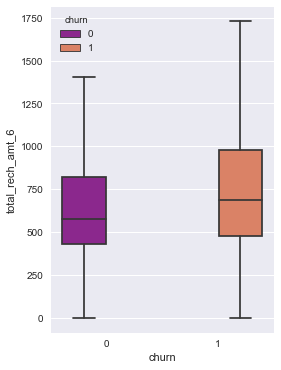

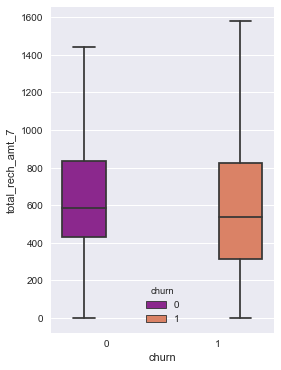

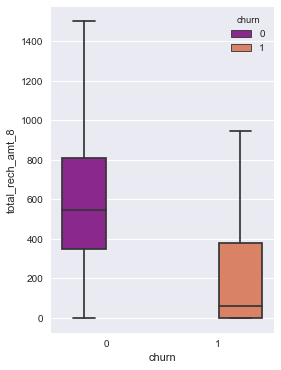

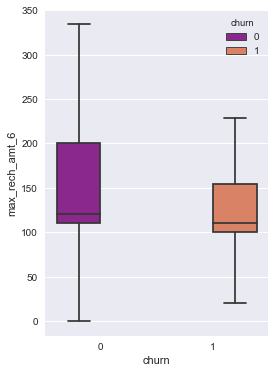

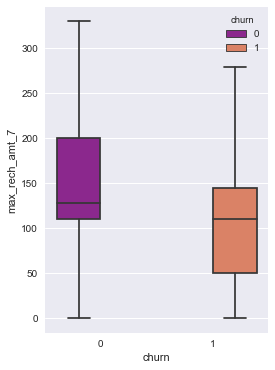

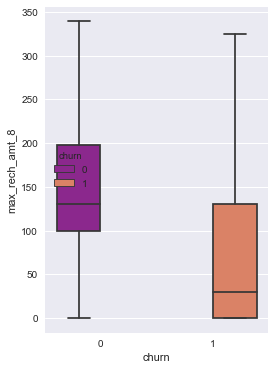

In [38]:
for c in recharge_amt:
    box_charts(c)
    

In [39]:
# In 8th month total recahrge amount and max recharge amount have sudden drop in churned customer

In [40]:
#Other Colmns with recharge infromation
other = high_value_data.columns[high_value_data.columns.str.contains('rech_num|max_rech_data',regex=True)]


In [41]:
100*high_value_data.loc[:,other].isnull().sum()/len(high_value_data)

total_rech_num_6    0.0
total_rech_num_7    0.0
total_rech_num_8    0.0
dtype: float64

In [42]:
high_value_data.loc[:,other].describe()

,total_rech_num_6,total_rech_num_7,total_rech_num_8
count,30011.000000,30011.000000,30011.000000
mean,12.121322,11.913465,10.225317
std,9.543550,9.605532,9.478572
min,0.000000,0.000000,0.000000
25%,6.000000,6.000000,4.000000
50%,9.000000,9.000000,8.000000
75%,15.000000,15.000000,13.000000
max,307.000000,138.000000,196.000000


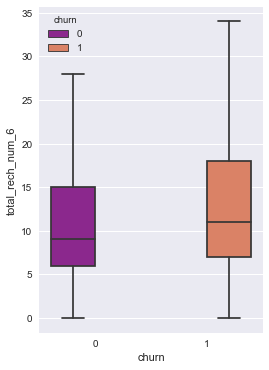

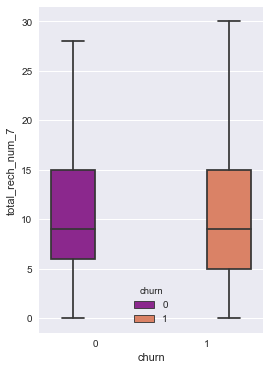

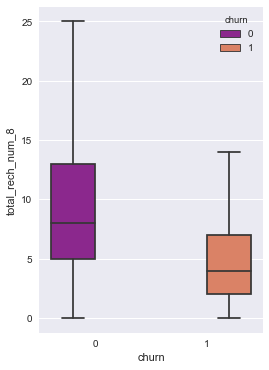

In [43]:
for c in other:
    box_charts(c)

In [44]:
#Huge drop in 8 month in churn case

In [45]:
last_recharge_amt = list(high_value_data.columns[high_value_data.columns.str.contains('day')])
last_recharge_amt

['last_day_rch_amt_6', 'last_day_rch_amt_7', 'last_day_rch_amt_8']

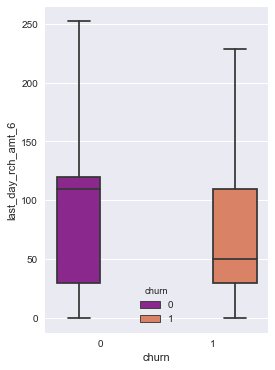

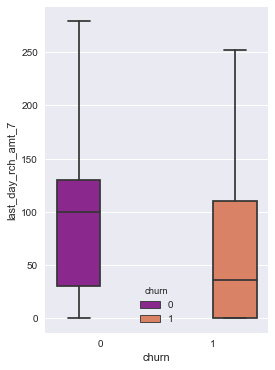

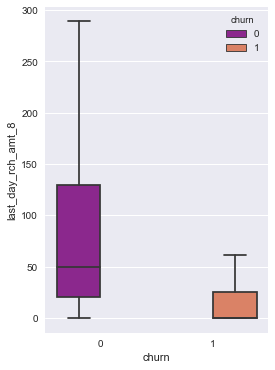

In [46]:
for c in last_recharge_amt:
    box_charts(c)

In [47]:
#uge drop in 8th month recharge amount for churned customers.

In [48]:
net_usage = high_value_data.columns[high_value_data.columns.str.contains('2g|3g',regex=True)]
net_usage

Index(['vol_2g_mb_6', 'vol_2g_mb_7', 'vol_2g_mb_8', 'vol_3g_mb_6',
       'vol_3g_mb_7', 'vol_3g_mb_8', 'monthly_2g_6', 'monthly_2g_7',
       'monthly_2g_8', 'sachet_2g_6', 'sachet_2g_7', 'sachet_2g_8',
       'monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8', 'sachet_3g_6',
       'sachet_3g_7', 'sachet_3g_8', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g',
       'sep_vbc_3g'],
      dtype='object')

In [49]:
100*high_value_data.loc[:,net_usage].isnull().sum()/len(high_value_data)

vol_2g_mb_6     0.0
vol_2g_mb_7     0.0
vol_2g_mb_8     0.0
vol_3g_mb_6     0.0
vol_3g_mb_7     0.0
vol_3g_mb_8     0.0
monthly_2g_6    0.0
monthly_2g_7    0.0
monthly_2g_8    0.0
sachet_2g_6     0.0
sachet_2g_7     0.0
sachet_2g_8     0.0
monthly_3g_6    0.0
monthly_3g_7    0.0
monthly_3g_8    0.0
sachet_3g_6     0.0
sachet_3g_7     0.0
sachet_3g_8     0.0
aug_vbc_3g      0.0
jul_vbc_3g      0.0
jun_vbc_3g      0.0
sep_vbc_3g      0.0
dtype: float64

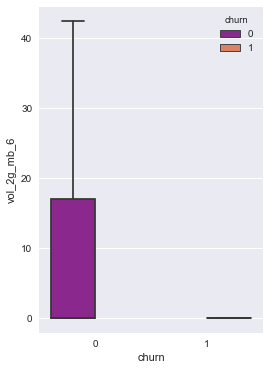

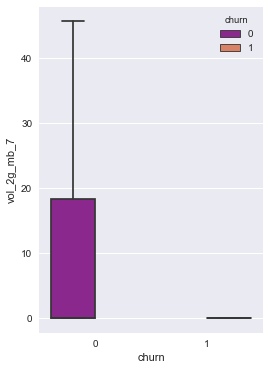

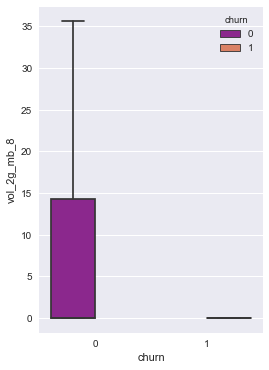

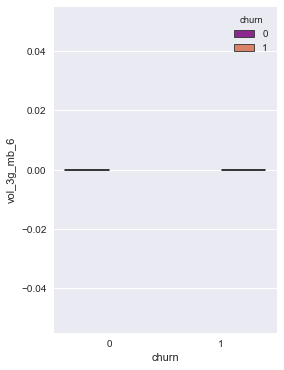

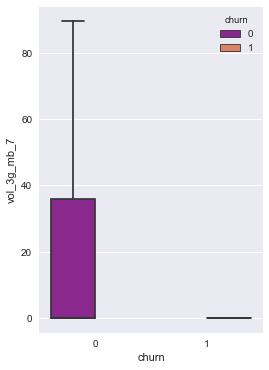

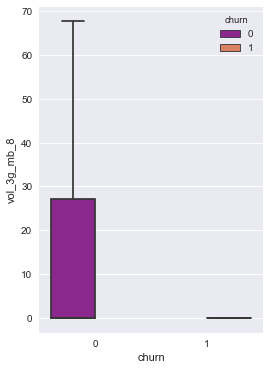

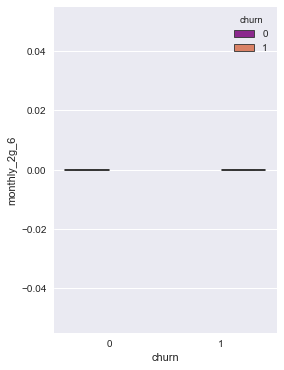

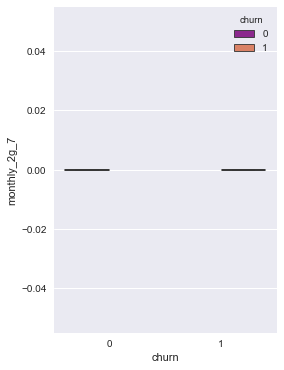

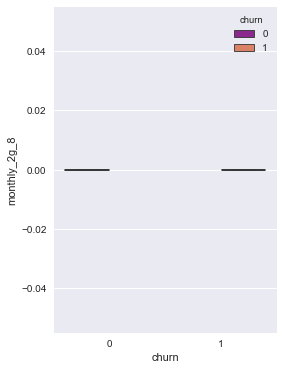

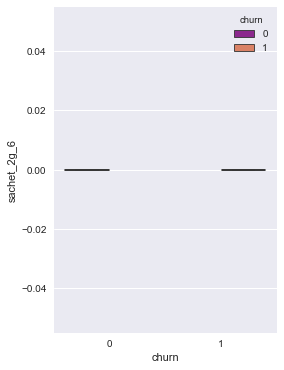

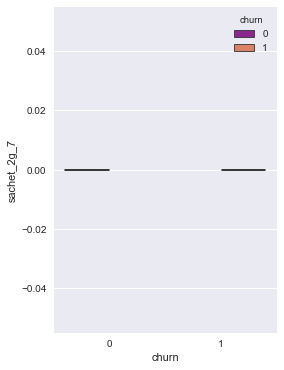

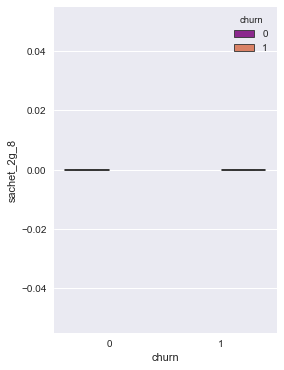

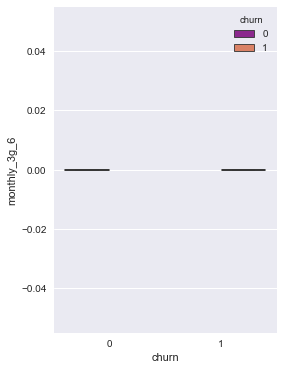

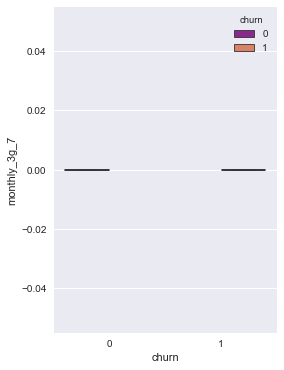

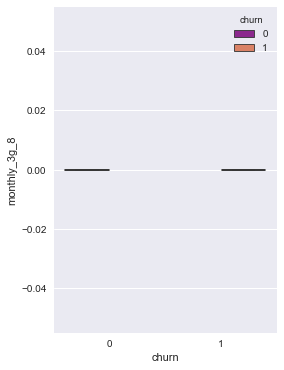

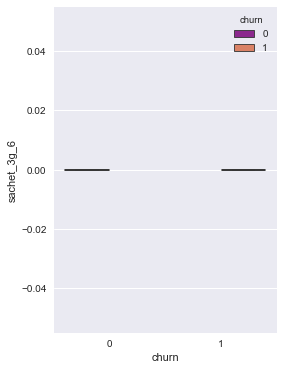

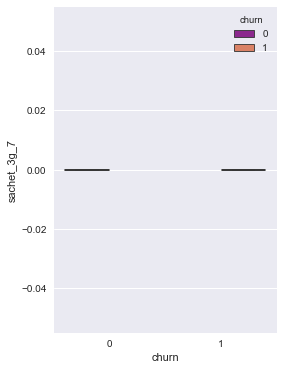

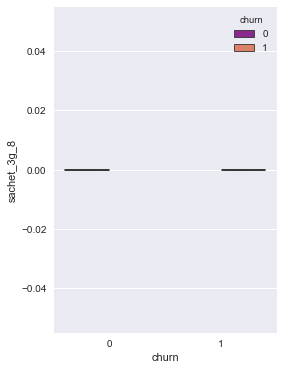

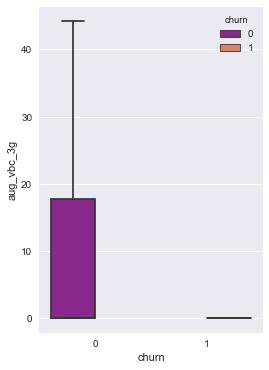

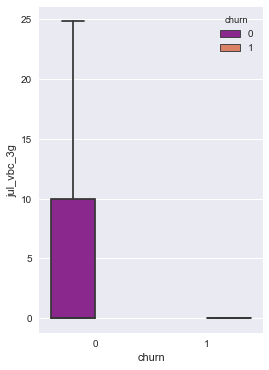

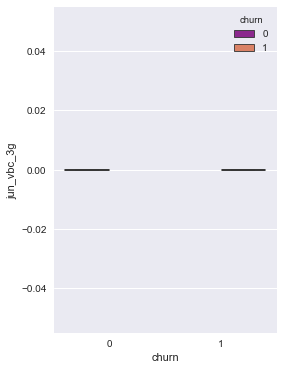

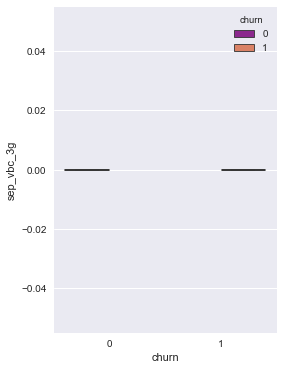

In [50]:
for c in net_usage:
    box_charts(c)

In [51]:
#1) 2G and 3G usage for churned customers drops in 8th month
#2  2G/3G usage is higher for non-churned customers.
#Churned customer might be from poor net coverage area.

In [52]:
monthly_scheme = list(high_value_data.columns[high_value_data.columns.str.contains('monthly_2g|monthly_3g',regex=True)])
monthly_scheme

    

['monthly_2g_6',
 'monthly_2g_7',
 'monthly_2g_8',
 'monthly_3g_6',
 'monthly_3g_7',
 'monthly_3g_8']

In [53]:

def nul_plot(a):
    print(100*high_value_data.loc[:,a].isnull().sum()/len(high_value_data))
    for c in a:
        box_charts(c);
        

monthly_2g_6    0.0
monthly_2g_7    0.0
monthly_2g_8    0.0
monthly_3g_6    0.0
monthly_3g_7    0.0
monthly_3g_8    0.0
dtype: float64


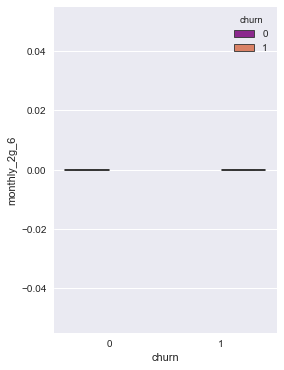

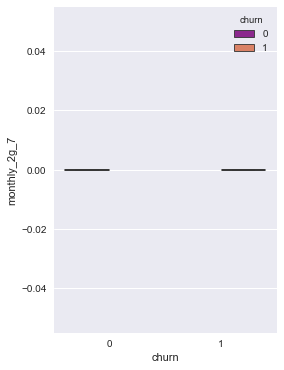

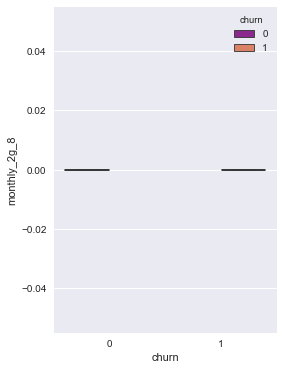

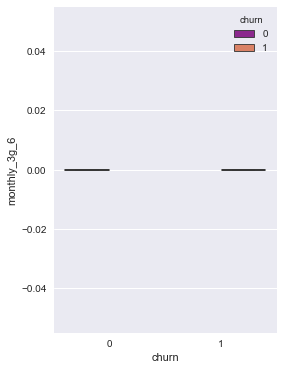

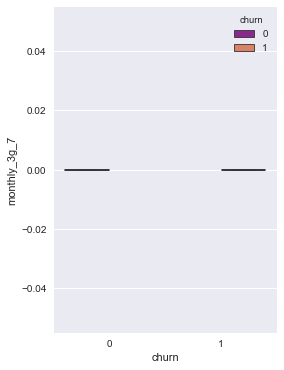

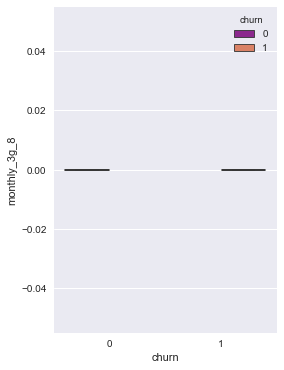

In [54]:
nul_plot(monthly_scheme)

In [55]:
#Range is very low, no results can be concluded

In [56]:
#cheking volume data
volume = list(high_value_data.columns[high_value_data.columns.str.contains('vbc_',regex=True)])

aug_vbc_3g    0.0
jul_vbc_3g    0.0
jun_vbc_3g    0.0
sep_vbc_3g    0.0
dtype: float64


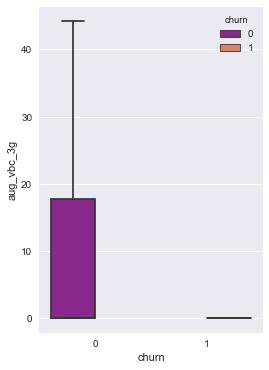

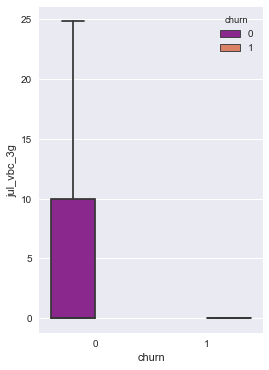

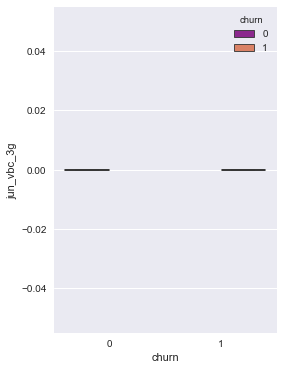

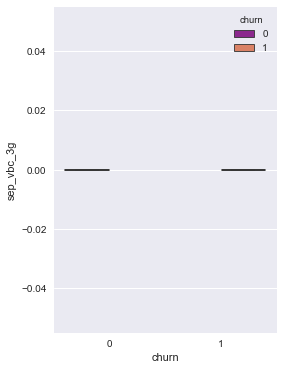

In [57]:
nul_plot(volume)

In [58]:
#Range is very low, no results can be concluded

In [59]:
arpu = high_value_data.columns[high_value_data.columns.str.contains('arpu_')]

arpu_6    0.0
arpu_7    0.0
arpu_8    0.0
dtype: float64


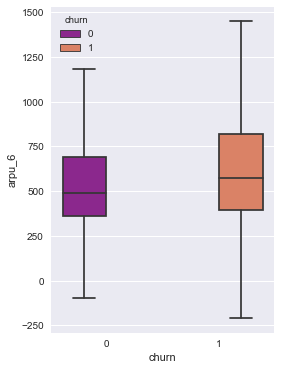

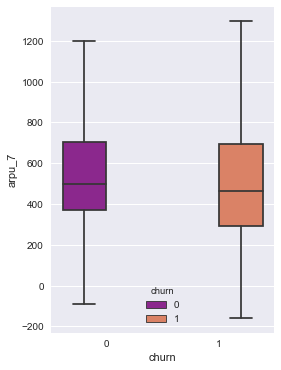

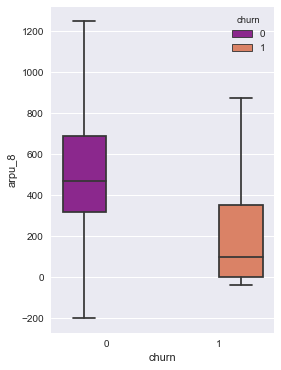

In [60]:
nul_plot(arpu)

In [61]:
#huge drop in 8th month

In [62]:
min_usage = high_value_data.columns[high_value_data.columns.str.contains('mou')]

In [63]:
100*high_value_data.loc[:,min_usage].isnull().sum()/len(high_value_data)

onnet_mou_6         1.052947
onnet_mou_7         1.009630
onnet_mou_8         3.125521
offnet_mou_6        1.052947
offnet_mou_7        1.009630
offnet_mou_8        3.125521
roam_ic_mou_6       1.052947
roam_ic_mou_7       1.009630
roam_ic_mou_8       3.125521
roam_og_mou_6       1.052947
roam_og_mou_7       1.009630
roam_og_mou_8       3.125521
loc_og_t2t_mou_6    1.052947
loc_og_t2t_mou_7    1.009630
loc_og_t2t_mou_8    3.125521
loc_og_t2m_mou_6    1.052947
loc_og_t2m_mou_7    1.009630
loc_og_t2m_mou_8    3.125521
loc_og_t2f_mou_6    1.052947
loc_og_t2f_mou_7    1.009630
loc_og_t2f_mou_8    3.125521
loc_og_t2c_mou_6    1.052947
loc_og_t2c_mou_7    1.009630
loc_og_t2c_mou_8    3.125521
loc_og_mou_6        1.052947
loc_og_mou_7        1.009630
loc_og_mou_8        3.125521
std_og_t2t_mou_6    1.052947
std_og_t2t_mou_7    1.009630
std_og_t2t_mou_8    3.125521
                      ...   
loc_ic_t2m_mou_6    1.052947
loc_ic_t2m_mou_7    1.009630
loc_ic_t2m_mou_8    3.125521
loc_ic_t2f_mou

In [64]:
#Missing values are less then 4 , customers have not used call types, thus replacing it with 0

In [65]:
high_value_data.loc[:,min_usage] = high_value_data.loc[:,min_usage].replace(np.NaN,0)

In [66]:
#extracting infromation for outgoing calls

outgoing = list(high_value_data.columns[high_value_data.columns.str.contains('.*_og_.*mou_6',regex=True)])
outgoing

['roam_og_mou_6',
 'loc_og_t2t_mou_6',
 'loc_og_t2m_mou_6',
 'loc_og_t2f_mou_6',
 'loc_og_t2c_mou_6',
 'loc_og_mou_6',
 'std_og_t2t_mou_6',
 'std_og_t2m_mou_6',
 'std_og_t2f_mou_6',
 'std_og_mou_6',
 'isd_og_mou_6',
 'spl_og_mou_6',
 'total_og_mou_6']

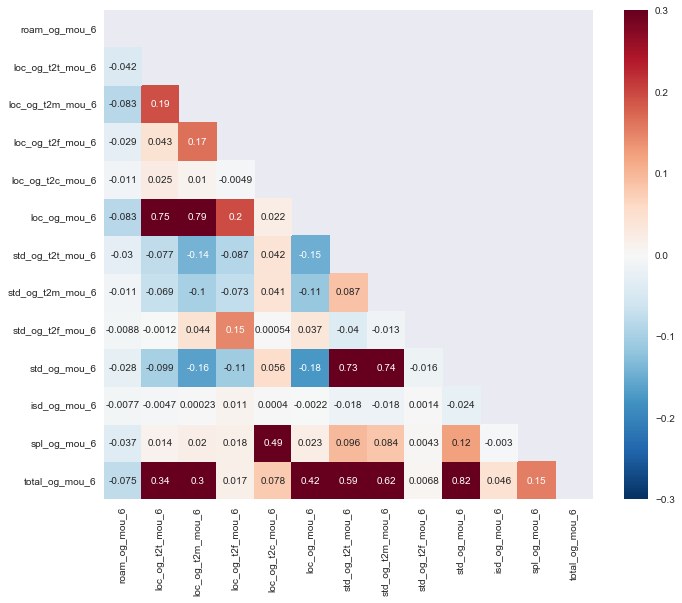

In [67]:
import numpy as np
corr = high_value_data.filter(outgoing).corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True,annot=True);

In [68]:
#removing Stong corelation columns

In [69]:
total_outgoing = high_value_data.columns[high_value_data.columns.str.contains('total_og_mou|std_og_mou|loc_og_mou',regex=True)]
high_value_data.drop(total_outgoing,axis=1,inplace=True)


In [70]:
#Incoming

incoming = high_value_data.columns[high_value_data.columns.str.contains('.*_ic_.*mou_6',regex=True)]

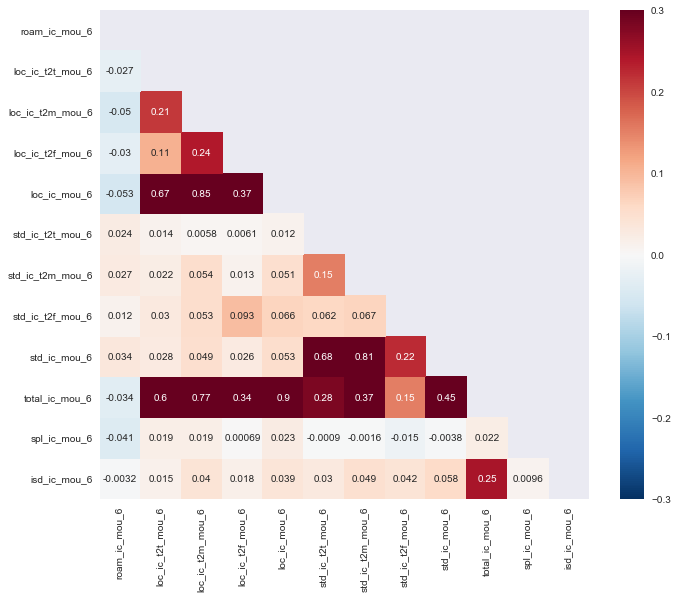

In [71]:
import numpy as np
corr = high_value_data.filter(incoming).corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
with sns.axes_style("dark"):
    ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True,annot=True);

In [72]:
## To create column tenure

In [73]:
high_value_data['tenure'] = high_value_data['aon']/30

In [74]:
n = [0, 6, 12, 24, 60, 61]
tenure_label = [ '0-6 Months', '6-12 Months', '1-2 Yrs', '2-5 Yrs', '5 Yrs and above']
high_value_data['tenure_range'] = pd.cut(high_value_data['tenure'], n, labels=tenure_label)
high_value_data['tenure_range'].head()


7         2-5 Yrs
8     6-12 Months
13            NaN
16        1-2 Yrs
17        1-2 Yrs
Name: tenure_range, dtype: category
Categories (5, object): [0-6 Months < 1-2 Yrs < 2-5 Yrs < 5 Yrs and above < 6-12 Months]

In [75]:
(100*(high_value_data.isnull().sum()/len(high_value_data))).sort_values(ascending=False).head(60)

tenure_range           26.010463
ic_others_8             3.125521
og_others_8             3.125521
date_of_last_rech_8     1.979274
og_others_6             1.052947
ic_others_6             1.052947
og_others_7             1.009630
ic_others_7             1.009630
date_of_last_rech_7     0.379861
date_of_last_rech_6     0.206591
loc_ic_t2f_mou_7        0.000000
std_og_t2m_mou_8        0.000000
std_og_t2f_mou_6        0.000000
std_og_t2f_mou_7        0.000000
std_og_t2f_mou_8        0.000000
isd_og_mou_6            0.000000
isd_og_mou_7            0.000000
isd_og_mou_8            0.000000
spl_og_mou_6            0.000000
arpu_7                  0.000000
loc_ic_mou_8            0.000000
loc_ic_mou_7            0.000000
loc_ic_t2f_mou_8        0.000000
spl_og_mou_8            0.000000
loc_ic_mou_6            0.000000
std_og_t2m_mou_7        0.000000
arpu_6                  0.000000
loc_ic_t2t_mou_6        0.000000
loc_ic_t2t_mou_7        0.000000
loc_ic_t2t_mou_8        0.000000
loc_ic_t2m

In [76]:
#Imputing missing values


Null_Percentage = high_value_data.isnull().sum(axis =0).sort_values(ascending=False)

In [77]:
Null_Percentage

tenure_range           7806
ic_others_8             938
og_others_8             938
date_of_last_rech_8     594
og_others_6             316
ic_others_6             316
og_others_7             303
ic_others_7             303
date_of_last_rech_7     114
date_of_last_rech_6      62
loc_ic_t2f_mou_7          0
std_og_t2m_mou_8          0
std_og_t2f_mou_6          0
std_og_t2f_mou_7          0
std_og_t2f_mou_8          0
isd_og_mou_6              0
isd_og_mou_7              0
isd_og_mou_8              0
spl_og_mou_6              0
arpu_7                    0
loc_ic_mou_8              0
loc_ic_mou_7              0
loc_ic_t2f_mou_8          0
spl_og_mou_8              0
loc_ic_mou_6              0
std_og_t2m_mou_7          0
arpu_6                    0
loc_ic_t2t_mou_6          0
loc_ic_t2t_mou_7          0
loc_ic_t2t_mou_8          0
                       ... 
last_day_rch_amt_8        0
last_day_rch_amt_7        0
spl_ic_mou_7              0
std_ic_t2m_mou_7          0
tenure              

In [78]:
a=[]
for i in Null_Percentage:
    if i>0:
        a.append(i)

In [79]:
len(a)

10

In [80]:
Null_Percentage= list(Null_Percentage.index)

In [81]:
Null_Percentage = Null_Percentage[:11]

In [82]:
Null_Percentage

['tenure_range',
 'ic_others_8',
 'og_others_8',
 'date_of_last_rech_8',
 'og_others_6',
 'ic_others_6',
 'og_others_7',
 'ic_others_7',
 'date_of_last_rech_7',
 'date_of_last_rech_6',
 'loc_ic_t2f_mou_7']

In [83]:
high_value_data['tenure_range']=high_value_data['tenure_range'].fillna('1-2 Yrs')

In [84]:
Null_Percentage = Null_Percentage[1:]

In [85]:
Null_Percentage

['ic_others_8',
 'og_others_8',
 'date_of_last_rech_8',
 'og_others_6',
 'ic_others_6',
 'og_others_7',
 'ic_others_7',
 'date_of_last_rech_7',
 'date_of_last_rech_6',
 'loc_ic_t2f_mou_7']

In [86]:
for i in Null_Percentage:
    high_value_data.loc[high_value_data[i].isnull(),i]=0

In [87]:
high_value_data.isnull().sum(axis =0).sort_values(ascending=False)

tenure_range           0
loc_ic_t2t_mou_6       0
std_og_t2m_mou_8       0
std_og_t2f_mou_6       0
std_og_t2f_mou_7       0
std_og_t2f_mou_8       0
isd_og_mou_6           0
isd_og_mou_7           0
isd_og_mou_8           0
spl_og_mou_6           0
spl_og_mou_7           0
spl_og_mou_8           0
og_others_6            0
og_others_7            0
og_others_8            0
loc_ic_t2t_mou_7       0
std_og_t2m_mou_6       0
loc_ic_t2t_mou_8       0
loc_ic_t2m_mou_6       0
loc_ic_t2m_mou_7       0
loc_ic_t2m_mou_8       0
loc_ic_t2f_mou_6       0
loc_ic_t2f_mou_7       0
loc_ic_t2f_mou_8       0
loc_ic_mou_6           0
loc_ic_mou_7           0
loc_ic_mou_8           0
std_ic_t2t_mou_6       0
std_ic_t2t_mou_7       0
std_ic_t2t_mou_8       0
                      ..
isd_ic_mou_8           0
std_ic_t2f_mou_7       0
std_ic_t2f_mou_8       0
std_ic_mou_6           0
std_ic_mou_7           0
std_ic_mou_8           0
total_ic_mou_6         0
total_ic_mou_7         0
total_ic_mou_8         0


In [88]:
dummy1 = pd.get_dummies(high_value_data['tenure_range'])

In [89]:
dummy1.head()

,0-6 Months,1-2 Yrs,2-5 Yrs,5 Yrs and above,6-12 Months
7,0,0,1,0,0
8,0,0,0,0,1
13,0,1,0,0,0
16,0,1,0,0,0
17,0,1,0,0,0


In [90]:
high_value_data = pd.concat([high_value_data, dummy1], axis=1)
high_value_data.head()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,...,total_rech_data_amt_8,total_avg_rech_amnt_6_7_GPhase,churn,tenure,tenure_range,0-6 Months,1-2 Yrs,2-5 Yrs,5 Yrs and above,6-12 Months
7,7000701601,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,...,0.0,1185.0,1,26.733333,2-5 Yrs,0,0,1,0,0
8,7001524846,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,...,207.0,519.0,0,10.500000,6-12 Months,0,0,0,0,1
13,7002191713,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,...,207.0,380.0,0,86.900000,1-2 Yrs,0,1,0,0,0
16,7000875565,430.975,299.869,187.894,50.51,74.01,70.61,296.29,229.74,162.76,...,0.0,459.0,0,17.033333,1-2 Yrs,0,1,0,0,0
17,7000187447,690.008,18.980,25.499,1185.91,9.28,7.79,61.64,0.00,5.54,...,0.0,408.0,0,22.233333,1-2 Yrs,0,1,0,0,0


In [91]:
high_value_data =high_value_data.drop(['tenure_range'], axis = 1)

In [92]:
high_value_data.head()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,...,total_rech_data_amt_7,total_rech_data_amt_8,total_avg_rech_amnt_6_7_GPhase,churn,tenure,0-6 Months,1-2 Yrs,2-5 Yrs,5 Yrs and above,6-12 Months
7,7000701601,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,...,0.0,0.0,1185.0,1,26.733333,0,0,1,0,0
8,7001524846,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,...,354.0,207.0,519.0,0,10.500000,0,0,0,0,1
13,7002191713,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,...,0.0,207.0,380.0,0,86.900000,0,1,0,0,0
16,7000875565,430.975,299.869,187.894,50.51,74.01,70.61,296.29,229.74,162.76,...,0.0,0.0,459.0,0,17.033333,0,1,0,0,0
17,7000187447,690.008,18.980,25.499,1185.91,9.28,7.79,61.64,0.00,5.54,...,0.0,0.0,408.0,0,22.233333,0,1,0,0,0


In [93]:
high_value_data.info(verbose=True,null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30011 entries, 7 to 99997
Data columns (total 131 columns):
mobile_number                     30011 non-null int64
arpu_6                            30011 non-null float64
arpu_7                            30011 non-null float64
arpu_8                            30011 non-null float64
onnet_mou_6                       30011 non-null float64
onnet_mou_7                       30011 non-null float64
onnet_mou_8                       30011 non-null float64
offnet_mou_6                      30011 non-null float64
offnet_mou_7                      30011 non-null float64
offnet_mou_8                      30011 non-null float64
roam_ic_mou_6                     30011 non-null float64
roam_ic_mou_7                     30011 non-null float64
roam_ic_mou_8                     30011 non-null float64
roam_og_mou_6                     30011 non-null float64
roam_og_mou_7                     30011 non-null float64
roam_og_mou_8                     300

In [94]:
list(set(high_value_data.columns) - set(high_value_data.describe().columns))

['date_of_last_rech_7', 'date_of_last_rech_6', 'date_of_last_rech_8']

In [95]:
# Create a copy of high value data for PCA.(Without removing highly correlated columns) 
high_value_data_v1=high_value_data.copy()

In [96]:
#removing Stong corelation columns

In [97]:
total_incoming = high_value_data.columns[high_value_data.columns.str.contains('total_ic_mou|std_ic_mou|loc_ic_mou',regex=True)]
high_value_data.drop(total_incoming,axis=1,inplace=True)

# Modelling
#PCA : Principal Component Analysis¶


In [98]:
from sklearn.model_selection import train_test_split

In [99]:
X = high_value_data.drop(['date_of_last_rech_8','date_of_last_rech_7','date_of_last_rech_6','mobile_number','churn'], axis=1)

In [100]:
X.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,total_rech_data_amt_6,total_rech_data_amt_7,total_rech_data_amt_8,total_avg_rech_amnt_6_7_GPhase,tenure,0-6 Months,1-2 Yrs,2-5 Yrs,5 Yrs and above,6-12 Months
7,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,...,0.0,0.0,0.0,1185.0,26.733333,0,0,1,0,0
8,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,...,0.0,354.0,207.0,519.0,10.500000,0,0,0,0,1
13,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,23.53,...,0.0,0.0,207.0,380.0,86.900000,0,1,0,0,0
16,430.975,299.869,187.894,50.51,74.01,70.61,296.29,229.74,162.76,0.00,...,0.0,0.0,0.0,459.0,17.033333,0,1,0,0,0
17,690.008,18.980,25.499,1185.91,9.28,7.79,61.64,0.00,5.54,0.00,...,0.0,0.0,0.0,408.0,22.233333,0,1,0,0,0


In [101]:
y = high_value_data['churn']

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=1)


In [103]:
from sklearn.decomposition import PCA

In [104]:
pca = PCA(random_state=42)

In [105]:
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='auto', tol=0.0, whiten=False)

#### Components from the PCA

In [106]:
pca.components_

array([[  4.49946959e-02,   5.01455687e-02,   5.05613354e-02, ...,
          8.72842164e-07,   1.80338457e-08,   2.22703503e-06],
       [  2.51173977e-01,   3.04468415e-01,   3.08516687e-01, ...,
          3.27474364e-06,  -2.50553781e-07,   4.20664229e-06],
       [  5.81280788e-02,  -9.01164999e-03,  -3.66053184e-02, ...,
         -4.88937073e-06,   3.20938057e-08,  -8.77235545e-07],
       ..., 
       [ -0.00000000e+00,   3.92036772e-16,  -2.38952377e-16, ...,
          3.81757530e-04,   3.81757530e-04,   3.81757530e-04],
       [  0.00000000e+00,  -2.28744033e-17,  -1.22828660e-16, ...,
         -1.23496247e-03,  -1.23496247e-03,  -1.23496247e-03],
       [  0.00000000e+00,   2.94325825e-20,  -5.22232564e-20, ...,
          4.47211727e-01,   4.47211727e-01,   4.47211727e-01]])

Looking at the explained variance ratio for each component

In [107]:
pca.explained_variance_ratio_

array([  3.27062976e-01,   1.20207892e-01,   8.94177608e-02,
         7.49715424e-02,   6.54960445e-02,   6.12557816e-02,
         5.60945485e-02,   3.47528964e-02,   2.34274995e-02,
         1.66829860e-02,   1.35285628e-02,   1.28485398e-02,
         1.16758796e-02,   1.07828442e-02,   9.72375438e-03,
         9.08849046e-03,   8.71815987e-03,   4.87756216e-03,
         4.51546339e-03,   4.16208899e-03,   3.94320882e-03,
         3.36648962e-03,   3.28381228e-03,   2.66288991e-03,
         2.13020879e-03,   2.12505711e-03,   1.86628879e-03,
         1.81004883e-03,   1.70048762e-03,   1.55409912e-03,
         1.54974959e-03,   1.34697919e-03,   1.26104471e-03,
         9.58905426e-04,   9.04252944e-04,   7.94762234e-04,
         7.80327254e-04,   7.59643407e-04,   6.94817234e-04,
         5.93474985e-04,   5.67785361e-04,   5.32518280e-04,
         4.96965569e-04,   4.64257151e-04,   4.46723394e-04,
         4.05970176e-04,   3.71773786e-04,   3.50432267e-04,
         3.35797392e-04,

Making a scree plot for the explained variance

In [108]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

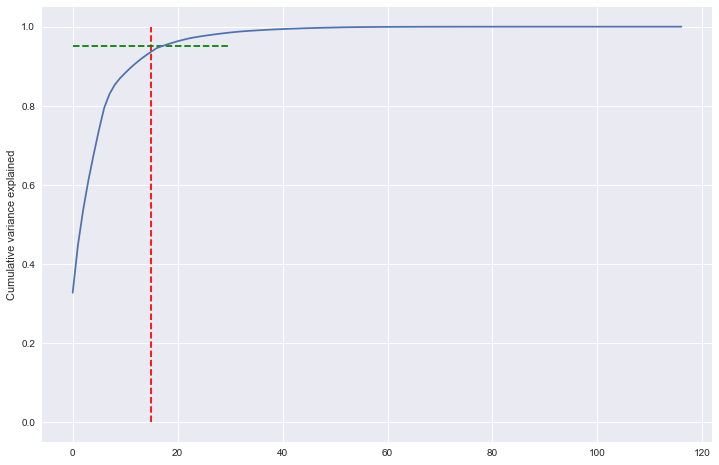

In [109]:
fig = plt.figure(figsize=[12,8])
plt.vlines(x=15, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=30, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

Perform PCA with 19 components

In [110]:
from sklearn.decomposition import IncrementalPCA

In [111]:
pca_final = IncrementalPCA(n_components=19)

In [112]:
df_train_pca = pca_final.fit_transform(X_train)

In [113]:
df_train_pca.shape

(21007, 19)

In [114]:
corrmat = np.corrcoef(df_train_pca.transpose())

In [115]:
corrmat.shape

(19, 19)

Plotting the heatmap of the corr matrix

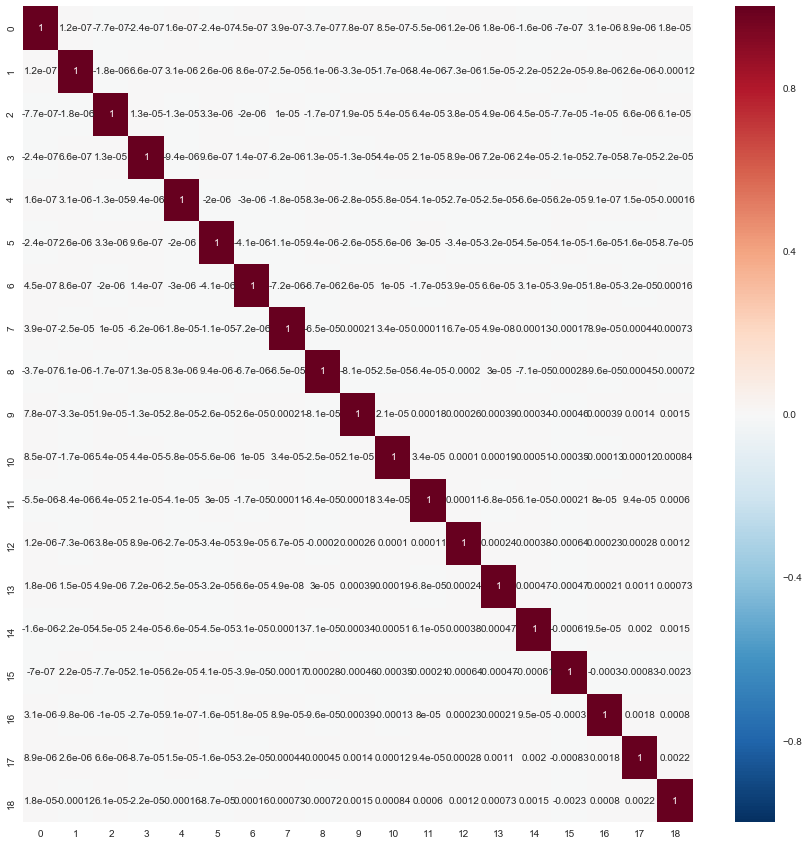

In [116]:
plt.figure(figsize=[15,15])
sns.heatmap(corrmat, annot=True)

Applying the transformation on the test set

In [117]:
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(9004, 19)

In [118]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [119]:
learner_pca = LogisticRegression()

In [120]:
model_pca = learner_pca.fit(df_train_pca, y_train)

Making predictions on the test set

In [121]:
pred_probs_test = model_pca.predict_proba(df_test_pca)

In [122]:
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test[:,1]))

'0.84'

#### Making it a little more unsupervised 

In [123]:
pca_again = PCA(0.9)

In [124]:
df_train_pca2 = pca_again.fit_transform(X_train)

In [125]:
df_train_pca2.shape

(21007, 13)

Following it up with a logistic regression model

In [126]:
learner_pca2 = LogisticRegression()

In [127]:
model_pca2 = learner_pca2.fit(df_train_pca2, y_train)

In [128]:
df_test_pca2 = pca_again.transform(X_test)

In [129]:
df_test_pca2.shape

(9004, 13)

In [130]:
pred_probs_test2 = model_pca2.predict_proba(df_test_pca2)[:,1]

In [131]:
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test2))

'0.84'

## Reshma's Working.
### PCA after standardising the independent variables.

In [132]:
#Import libraries
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA

from sklearn.metrics import confusion_matrix
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [133]:
high_value_data_v1.head()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,...,total_rech_data_amt_7,total_rech_data_amt_8,total_avg_rech_amnt_6_7_GPhase,churn,tenure,0-6 Months,1-2 Yrs,2-5 Yrs,5 Yrs and above,6-12 Months
7,7000701601,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,...,0.0,0.0,1185.0,1,26.733333,0,0,1,0,0
8,7001524846,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,...,354.0,207.0,519.0,0,10.500000,0,0,0,0,1
13,7002191713,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,...,0.0,207.0,380.0,0,86.900000,0,1,0,0,0
16,7000875565,430.975,299.869,187.894,50.51,74.01,70.61,296.29,229.74,162.76,...,0.0,0.0,459.0,0,17.033333,0,1,0,0,0
17,7000187447,690.008,18.980,25.499,1185.91,9.28,7.79,61.64,0.00,5.54,...,0.0,0.0,408.0,0,22.233333,0,1,0,0,0


In [134]:
high_value_data_v1.shape

(30011, 131)

In [135]:
high_value_data_v1.info(verbose=True,null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30011 entries, 7 to 99997
Data columns (total 131 columns):
mobile_number                     30011 non-null int64
arpu_6                            30011 non-null float64
arpu_7                            30011 non-null float64
arpu_8                            30011 non-null float64
onnet_mou_6                       30011 non-null float64
onnet_mou_7                       30011 non-null float64
onnet_mou_8                       30011 non-null float64
offnet_mou_6                      30011 non-null float64
offnet_mou_7                      30011 non-null float64
offnet_mou_8                      30011 non-null float64
roam_ic_mou_6                     30011 non-null float64
roam_ic_mou_7                     30011 non-null float64
roam_ic_mou_8                     30011 non-null float64
roam_og_mou_6                     30011 non-null float64
roam_og_mou_7                     30011 non-null float64
roam_og_mou_8                     300

In [136]:
# To check again for the missing values

In [137]:
round(100*(high_value_data_v1.isnull().sum().sort_values(ascending=False)/len(high_value_data_v1.index)), 2)

6-12 Months            0.0
std_og_t2m_mou_7       0.0
std_og_t2f_mou_6       0.0
std_og_t2f_mou_7       0.0
std_og_t2f_mou_8       0.0
isd_og_mou_6           0.0
isd_og_mou_7           0.0
isd_og_mou_8           0.0
spl_og_mou_6           0.0
spl_og_mou_7           0.0
spl_og_mou_8           0.0
og_others_6            0.0
og_others_7            0.0
og_others_8            0.0
loc_ic_t2t_mou_6       0.0
loc_ic_t2t_mou_7       0.0
loc_ic_t2t_mou_8       0.0
loc_ic_t2m_mou_6       0.0
loc_ic_t2m_mou_7       0.0
loc_ic_t2m_mou_8       0.0
loc_ic_t2f_mou_6       0.0
loc_ic_t2f_mou_7       0.0
loc_ic_t2f_mou_8       0.0
loc_ic_mou_6           0.0
loc_ic_mou_7           0.0
loc_ic_mou_8           0.0
std_ic_t2t_mou_6       0.0
std_ic_t2t_mou_7       0.0
std_ic_t2t_mou_8       0.0
std_ic_t2m_mou_6       0.0
                      ... 
std_ic_mou_6           0.0
std_ic_mou_7           0.0
std_ic_mou_8           0.0
total_ic_mou_6         0.0
total_ic_mou_7         0.0
total_ic_mou_8         0.0
s

Since there are all zeroes, there are no missing values present in the data.

In [138]:
### Understanding the data using pair plot:
 
#axes = pd.plotting.scatter_matrix(high_value_data_v1)
#plt.tight_layout()

## Steps invovled in PCA¶

1) Standardize the data¶

2) Calculate the covariance matrix¶

3) Calculate the eigenvectors and the eigenvalues of the covariance matrix¶

4) Rank the eigenvectors by its corresponding eigenvalues and obtain the principal components with its column vectors corresponding to the top k eigenvectors¶

In [139]:
## Exclude dummy variables, target varable and columns with data type object from PCA

In [140]:
date_columns = list(high_value_data_v1.select_dtypes(include=['object']).columns)
date_columns


[]

In [141]:
del_col=['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8','0-6 Months','6-12 Months','1-2 Yrs','2-5 Yrs','5 Yrs and above'
,'churn','mobile_number']
del_col


['date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8',
 '0-6 Months',
 '6-12 Months',
 '1-2 Yrs',
 '2-5 Yrs',
 '5 Yrs and above',
 'churn',
 'mobile_number']

In [142]:
high_value_data_v1_pca=high_value_data_v1.drop(del_col, axis=1)
high_value_data_v1_pca.shape


(30011, 121)

In [143]:
high_value_data_v1.shape

(30011, 131)

### Step 1: Normalize the data

- First step is to normalize the data that we have so that PCA works properly.
- This is done by subtracting the respective means from the numbers in the respective column.
- So if we have two dimensions X and Y, all X become 𝔁- and all Y become 𝒚-. This produces a dataset whose mean is zero.

In [144]:
high_value_data_v1_pca_std = StandardScaler().fit_transform(high_value_data_v1_pca)
high_value_data_v1_pca_std

array([[ 1.08850063,  1.64340212,  5.35625221, ..., -0.2108245 ,
         0.99910326, -0.47379263],
       [-0.47110079, -0.20936379, -0.80750496, ..., -0.07158039,
        -0.36348983, -0.97315337],
       [-0.21331646, -0.82841354,  0.11864379, ..., -0.07158039,
        -0.64787487,  1.3770208 ],
       ..., 
       [ 0.13030639, -0.28928557,  0.05988113, ..., -0.19400758,
         0.31064594,  1.46827975],
       [-0.62054907, -0.16462531, -0.26973501, ..., -0.10723226,
        -0.46987848, -0.95982341],
       [-0.59698312, -0.61731592,  0.14618459, ...,  1.71572196,
        -0.66935719, -0.8060162 ]])

### Step 2: Calculate the covariance matrix

In [145]:
cov_matrix = np.cov(high_value_data_v1_pca_std.T)
print(cov_matrix.shape)
print('Covariance Matrix \n%s', cov_matrix)

(121, 121)
Covariance Matrix 
%s [[ 1.00003332  0.6316025   0.57095538 ...,  0.07415314  0.86900878
  -0.00622628]
 [ 0.6316025   1.00003332  0.74083601 ...,  0.10023297  0.89093306
  -0.01724553]
 [ 0.57095538  0.74083601  1.00003332 ...,  0.18194161  0.73725225
   0.0324731 ]
 ..., 
 [ 0.07415314  0.10023297  0.18194161 ...,  1.00003332  0.08989662
  -0.0196704 ]
 [ 0.86900878  0.89093306  0.73725225 ...,  0.08989662  1.00003332
  -0.00832262]
 [-0.00622628 -0.01724553  0.0324731  ..., -0.0196704  -0.00832262
   1.00003332]]


### Step 3: Calculate the eigenvalues and eigenvectors

In [146]:
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print(len(eig_vals))
print(eig_vecs.shape)

121
(121, 121)


In [147]:
print('Eigen Vectors \n%s', eig_vecs)
print('\n Eigen Values \n%s', eig_vals)

Eigen Vectors 
%s [[  1.54219456e-01   1.97871085e-01   2.77761974e-02 ...,   3.23547876e-07
   -1.07556784e-12   7.46979142e-13]
 [  1.66718365e-01   2.27349346e-01   3.25328025e-02 ...,  -4.28681042e-07
    5.53179504e-13  -4.89124667e-13]
 [  1.72057904e-01   2.07629839e-01   2.75185557e-02 ...,   3.57000378e-08
   -1.92245838e-13  -9.78431054e-13]
 ..., 
 [  4.09931713e-02   7.24709441e-02  -1.65504047e-01 ...,  -1.83106060e-07
   -1.40446106e-13   2.40576198e-13]
 [  1.77093737e-01   2.36655716e-01   3.34664717e-02 ...,   4.19616882e-07
    7.69674879e-01  -3.10844067e-02]
 [  6.73987413e-02  -8.69155212e-02  -3.85096422e-02 ...,  -2.34405419e-07
    1.25289968e-01  -7.06547997e-01]]

 Eigen Values 
%s [  1.12755362e+01   8.20923335e+00   7.32549086e+00   5.56670966e+00
   5.40218302e+00   4.61077876e+00   3.47972327e+00   3.34891503e+00
   3.17572781e+00   2.95106514e+00   2.76178848e+00   2.75109920e+00
   2.61492701e+00   2.47819149e+00   2.34339001e+00   2.27204886e+00
   2.02

In [148]:
eigen_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]
eigen_pairs_sorted = sorted(eigen_pairs, reverse=True)

In [149]:
eig_vals_sorted = [eigen_pairs_sorted[i][0] for i in range (len(eig_vals))]
eig_vecs_sorted = [eigen_pairs_sorted[i][1] for i in range (len(eig_vals))]

In [150]:
# Cumulative Variance Explained:
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [   9.31831444   16.10257875   22.1565017    26.7569349    31.2214002
   35.03183418   37.90754271   40.67514886   43.29962984   45.73844539
   48.02083915   50.2943991    52.45542379   54.50344769   56.44006912
   58.31773288   59.9924486    61.60571886   63.17385552   64.64653154
   66.06008793   67.4147138    68.71169405   69.83774853   70.93729247
   72.01549715   73.0510759    74.07795704   75.03674662   75.97174939
   76.84129593   77.67978276   78.48564336   79.27074734   80.02970413
   80.7473163    81.44325466   82.11632347   82.77810437   83.4122123
   84.03578384   84.64723598   85.24652035   85.81713757   86.35094813
   86.87602179   87.39090896   87.88391687   88.36511416   88.83220038
   89.2309823    89.6250108    90.00503602   90.37194662   90.72591947
   91.0763072    91.41772726   91.75496214   92.07885655   92.39985471
   92.70856253   93.00708962   93.30146131   93.58566668   93.86748996
   94.13933171   94.4069617    94.67121712   94.9

In [151]:
# Summary Plot of the cumulative Variance Explained:

plt.figure(figsize=(130, 121))
plt.bar(range(121), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(121), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

### Inference:

The first 109 principal components explain 99% of the variance in the data and these three PCA will have to be named because they represent composite of original dimensions.

We can also determine the number of PCA components based on how much variation we want the data to explain. Let's say we want to see hoy many PCA compenents explain 95% of the variance in data. For that we can proceed the following way:

In [152]:
# find the length of the variable that explains cumulative Variance Explained and customize it to the variation we want:

len(cum_var_exp[cum_var_exp<96])

73

In the above data, 73 variables explain 95% of the variation in the data.

### Building Model using Decision Tree algorithm  after Applying PCA

In [153]:
X=pd.concat([high_value_data_v1_pca,dummy1],axis=1)
X.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,total_rech_data_amt_6,total_rech_data_amt_7,total_rech_data_amt_8,total_avg_rech_amnt_6_7_GPhase,tenure,0-6 Months,1-2 Yrs,2-5 Yrs,5 Yrs and above,6-12 Months
7,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,...,0.0,0.0,0.0,1185.0,26.733333,0,0,1,0,0
8,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,...,0.0,354.0,207.0,519.0,10.500000,0,0,0,0,1
13,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,23.53,...,0.0,0.0,207.0,380.0,86.900000,0,1,0,0,0
16,430.975,299.869,187.894,50.51,74.01,70.61,296.29,229.74,162.76,0.00,...,0.0,0.0,0.0,459.0,17.033333,0,1,0,0,0
17,690.008,18.980,25.499,1185.91,9.28,7.79,61.64,0.00,5.54,0.00,...,0.0,0.0,0.0,408.0,22.233333,0,1,0,0,0


In [154]:
y=high_value_data_v1['churn']
y.head()

7     1
8     0
13    0
16    0
17    0
Name: churn, dtype: int32

In [155]:
# splitting the data into test and train:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [156]:
# Scaling the data:

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [157]:
# Applying PCA using sklearn:
pca = PCA(random_state=42,n_components=73)
X_train_2 = pca.fit_transform(X_train)
X_test_2 = pca.transform(X_test)

In [158]:
explained_variance = pca.explained_variance_ratio_  
explained_variance

array([ 0.08978323,  0.06579992,  0.0579938 ,  0.04445603,  0.04302992,
        0.03673753,  0.02822205,  0.02727982,  0.02485943,  0.02356328,
        0.02250071,  0.0221912 ,  0.02087167,  0.01996161,  0.01948301,
        0.01817951,  0.01693142,  0.01631227,  0.01582152,  0.0156905 ,
        0.0142252 ,  0.01354551,  0.01229583,  0.0119702 ,  0.0107144 ,
        0.01047782,  0.01038682,  0.00984532,  0.00978741,  0.009089  ,
        0.00880013,  0.00833658,  0.00805569,  0.00796478,  0.00778403,
        0.00766839,  0.00754515,  0.00736657,  0.00683421,  0.00675063,
        0.00652683,  0.00639824,  0.00628961,  0.00612908,  0.00601506,
        0.00589312,  0.00574902,  0.0054803 ,  0.00505982,  0.00495944,
        0.00484955,  0.00462646,  0.00445972,  0.00409411,  0.00387722,
        0.00375332,  0.00353553,  0.00338306,  0.00329652,  0.00322703,
        0.0031847 ,  0.00308658,  0.00306156,  0.00300442,  0.00285024,
        0.0027675 ,  0.00269974,  0.00257623,  0.00254883,  0.00

In [159]:
model2=tree.DecisionTreeClassifier()
model2.fit(X_train_2,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [160]:
# Predicitng the values:
y_pred_DT_2 = model2.predict(X_test_2)


# Confusion Matrix:
cm_PCA= confusion_matrix(y_test, y_pred_DT_2)

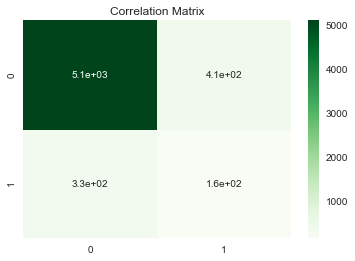

In [161]:
# Plotting the heatmap:

sns.heatmap(cm_PCA,annot=True, cmap='Greens')
plt.title('Correlation Matrix')
plt.show()

In [162]:
# Accuracy Score:

ac_PCA = accuracy_score(y_test, y_pred_DT_2)
print("Accuracy Score:", ac_PCA)

Accuracy Score: 0.876395135765


In [163]:
# Classification Report:

print('Classification Report:')
classification_2=classification_report(y_test,y_pred_DT_2)
print(classification_2)

Classification Report:
             precision    recall  f1-score   support

          0       0.94      0.93      0.93      5515
          1       0.28      0.32      0.30       488

avg / total       0.89      0.88      0.88      6003



In [164]:
# get importance
importance = model2.feature_importances_
# summarize feature importance

for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
#pyplot.bar([x for x in range(len(importance))], importance)
#pyplot.show()

Feature: 0, Score: 0.12685
Feature: 1, Score: 0.00492
Feature: 2, Score: 0.00784
Feature: 3, Score: 0.02179
Feature: 4, Score: 0.01072
Feature: 5, Score: 0.00891
Feature: 6, Score: 0.00558
Feature: 7, Score: 0.01966
Feature: 8, Score: 0.00939
Feature: 9, Score: 0.01947
Feature: 10, Score: 0.00745
Feature: 11, Score: 0.01618
Feature: 12, Score: 0.01577
Feature: 13, Score: 0.00933
Feature: 14, Score: 0.01171
Feature: 15, Score: 0.08623
Feature: 16, Score: 0.02080
Feature: 17, Score: 0.00789
Feature: 18, Score: 0.00767
Feature: 19, Score: 0.00861
Feature: 20, Score: 0.01030
Feature: 21, Score: 0.00999
Feature: 22, Score: 0.01798
Feature: 23, Score: 0.00551
Feature: 24, Score: 0.03035
Feature: 25, Score: 0.01567
Feature: 26, Score: 0.01468
Feature: 27, Score: 0.03336
Feature: 28, Score: 0.00862
Feature: 29, Score: 0.00763
Feature: 30, Score: 0.01373
Feature: 31, Score: 0.00460
Feature: 32, Score: 0.00872
Feature: 33, Score: 0.00655
Feature: 34, Score: 0.00565
Feature: 35, Score: 0.01244
Fe

# Model 4: XGBoost

In [1]:
import xgboost as xgb # XGBoost stuff
from sklearn.model_selection import train_test_split # split  data into training and testing sets
from sklearn.metrics import balanced_accuracy_score, roc_auc_score, make_scorer # for scoring during cross validation
from sklearn.model_selection import GridSearchCV # cross validation
from sklearn.metrics import confusion_matrix # creates a confusion matrix
#from sklearn.metrics import plot_confusion_matrix # draws a confusion matrix
from xgboost.sklearn import XGBClassifier

ModuleNotFoundError: No module named 'xgboost'

In [ ]:
#To check the count of churned customer

sum(y)/len(y)

So we see that only **9%** of the people in the dataset are churned. Because of this, when we split the data into training and testing, we will split using stratification in order to maintain the same percentage of people who churned in both the **training** set and the **testing** set.

In [ ]:
X_train_xg, X_test_xg, y_train_xg, y_test_xg = train_test_split(X, y, random_state=42, stratify=y)

In [ ]:
sum(y_train_xg)/len(y_train_xg)

In [ ]:
sum(y_test_xg)/len(y_test_xg)

In [ ]:
# Scaling the data:

sc = StandardScaler()
X_train_xg = sc.fit_transform(X_train_xg)
X_test_xg = sc.transform(X_test_xg)

In [ ]:
# Applying PCA using sklearn:
pca = PCA(random_state=42,n_components=73)
X_train_xg_2 = pca.fit_transform(X_train_xg)
X_test_xg_2 = pca.transform(X_test_xg)

In [ ]:
explained_variance = pca.explained_variance_ratio_  
explained_variance

In [ ]:
## XGBoost Model
model3_xgb=xgb.XGBClassifier(objective='binary:logistic', missing=None, seed=42)

model3_xgb.fit(X_train_xg_2, 
            y_train_xg,
            verbose=True,
            ## the next three arguments set up early stopping.
            early_stopping_rounds=10,
            eval_metric='aucpr',
            eval_set=[(X_test_xg_2, y_test_xg)])

In [ ]:
## Confusion matrix to check the permormance of a model on a test data
y_test_predicted=model3_xgb.predict(X_test_xg_2)
cm = confusion_matrix(y_test_xg, y_test_predicted)
print(cm)


In [ ]:
def Conf_mat(m):
    plt.clf()
    plt.imshow(m, interpolation='nearest', cmap=plt.cm.Wistia)
    classNames = ['Negative','Positive']
    plt.title('churned or Not churned Confusion Matrix - Test Data')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames, rotation=45)
    plt.yticks(tick_marks, classNames)
    s = [['TN','FP'], ['FN', 'TP']]
    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
    return(plt.show())

In [ ]:
Conf_mat(cm)

In [ ]:
TP=229
FP=118
TN=6737
FN=419

In [ ]:
Precision=round((TP)/(TP+FP),2)
print('Precision :',Precision)
Recall=round((TP)/(TP+FN),2)
print('Recall :',Recall)
F1 = round(2 * (Precision * Recall) / (Precision + Recall),2)
print('F1 Score:',F1)
Accuracy=round((TP+TN)/(TP+TN+FP+FN),2)
print('Accuracy :',Accuracy)

# Optimize Parameters using Cross Validation and GridSearch()

In [ ]:
# ## NOTE: When data are imbalanced, the XGBoost manual says...
# ## If you care only about the overall performance metric (AUC) of your prediction
# ##     * Balance the positive and negative weights via scale_pos_weight
# ##     * Use AUC for evaluation
# ## ALSO NOTE: I ran GridSearchCV sequentially on subsets of parameter options, rather than all at once
# ## in order to optimize parameters in a short period of time.

## ROUND 1
param_grid = {
  'max_depth': [3, 4, 5],
  'learning_rate': [0.1, 0.01, 0.05],
  'gamma': [0, 0.25, 1.0],
  'reg_lambda': [0, 1.0, 10.0],
  'scale_pos_weight': [1, 3, 5] # NOTE: XGBoost recommends sum(negative instances) / sum(positive instances)
}# NOTE: XGBoost recommends sum(negative instances) / sum(positive instances)
print(param_grid)
## Output: max_depth: 4, learning_rate: 0.1, gamma: 0.25, reg_lambda: 10, scale_pos_weight: 3
## Because learning_rate and reg_lambda were at the ends of their range, we will continue to explore those...



In [ ]:
## NOTE: To speed up cross validiation, and to further prevent overfitting.
## We are only using a random subset of the data (90%) and are only
## using a random subset of the features (columns) (50%) per tree.
optimal_params = GridSearchCV(
    estimator=xgb.XGBClassifier(objective='binary:logistic', 
                              seed=42,
                              subsample=0.9,
                              colsample_bytree=0.5),
                              param_grid=param_grid,
                              scoring='roc_auc', ## see https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
  verbose=0, # NOTE: If you want to see what Grid Search is doing, set verbose=2
  n_jobs = 10,
  cv = 3
)

optimal_params.fit(X_train, 
                 y_train, 
                  early_stopping_rounds=10,                
                  eval_metric='auc',
                  eval_set=[(X_test, y_test)],
                 verbose=False)
print(optimal_params.best_params_)